Supervised Learning Final Project

Non-parametric and parametric of predictor selection methods for multiple linear regression

1 methodology

1.1 Non-parametric methods

1.2 Parametric methods

1.1 Data input and EDA

In [2]:
# Load essential libraries for data analysis and modeling

library(tidyverse)  # A collection of R packages for data science tasks:
                    # - ggplot2: Data visualization
                    # - dplyr: Data manipulation
                    # - tidyr: Data tidying
                    # - readr: Data import
                    # - purrr: Functional programming
                    # - tibble: Modern data frames
                    # - stringr: String operations
                    # - forcats: Categorical variable handling
                    # These packages share a common design philosophy and are designed to work together seamlessly.

library(leaps)      # Provides functions for regression subset selection:
                    # - regsubsets(): Identifies the best subsets of predictors for linear regression models.
                    # Useful for best subset, forward, and backward selection methods.

library(MASS)       # Contains functions and datasets to support Venables and Ripley's "Modern Applied Statistics with S":
                    # - stepAIC(): Performs stepwise model selection using AIC.
                    # Also includes functions for robust statistical methods and data distributions.

library(olsrr)      # Offers tools for building and evaluating OLS regression models:
                    # - ols_step_forward_p(): Forward selection based on p-values.
                    # - ols_step_backward_p(): Backward elimination based on p-values.
                    # - ols_step_both_p(): Stepwise selection based on p-values.
                    # - ols_plot_diagnostics(): Diagnostic plots for regression models.
                    # Designed to simplify regression analysis and model selection.

library(ggplot2)
library(tidyr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



Attaching package: ‘olsrr’


The following object is masked from ‘package:MASS’:

    cement


The following object is masked from ‘package:datasets’:

    rivers




In [3]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "dataset"

In [4]:
list.files("/kaggle/input/")
concrete.data <- read.csv("/kaggle/input/dataset/concrete.data")  

head(concrete.data)
summary(concrete.data)
str(concrete.data)
dim(concrete.data)

[1] "dataset"

,No,Cement,Slag,Fly.ash,Water,SP,Coarse.Aggr.,Fine.Aggr.,SLUMP.cm.,FLOW.cm.,Compressive.Strength..28.day..Mpa.
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,273,82,105,210,9,904,680,23,62.0,34.99
2,2,163,149,191,180,12,843,746,0,20.0,41.14
3,3,162,148,191,179,16,840,743,1,20.0,41.81
4,4,162,148,190,179,19,838,741,3,21.5,42.08
5,5,154,112,144,220,10,923,658,20,64.0,26.82
6,6,147,89,115,202,9,860,829,23,55.0,25.21


       No            Cement           Slag           Fly.ash     
 Min.   :  1.0   Min.   :137.0   Min.   :  0.00   Min.   :  0.0  
 1st Qu.: 26.5   1st Qu.:152.0   1st Qu.:  0.05   1st Qu.:115.5  
 Median : 52.0   Median :248.0   Median :100.00   Median :164.0  
 Mean   : 52.0   Mean   :229.9   Mean   : 77.97   Mean   :149.0  
 3rd Qu.: 77.5   3rd Qu.:303.9   3rd Qu.:125.00   3rd Qu.:235.9  
 Max.   :103.0   Max.   :374.0   Max.   :193.00   Max.   :260.0  
     Water             SP         Coarse.Aggr.      Fine.Aggr.   
 Min.   :160.0   Min.   : 4.40   Min.   : 708.0   Min.   :640.6  
 1st Qu.:180.0   1st Qu.: 6.00   1st Qu.: 819.5   1st Qu.:684.5  
 Median :196.0   Median : 8.00   Median : 879.0   Median :742.7  
 Mean   :197.2   Mean   : 8.54   Mean   : 884.0   Mean   :739.6  
 3rd Qu.:209.5   3rd Qu.:10.00   3rd Qu.: 952.8   3rd Qu.:788.0  
 Max.   :240.0   Max.   :19.00   Max.   :1049.9   Max.   :902.0  
   SLUMP.cm.        FLOW.cm.     Compressive.Strength..28.day..Mpa.
 Min.   

'data.frame':	103 obs. of  11 variables:
 $ No                                : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Cement                            : num  273 163 162 162 154 147 152 145 152 304 ...
 $ Slag                              : num  82 149 148 148 112 89 139 0 0 0 ...
 $ Fly.ash                           : num  105 191 191 190 144 115 178 227 237 140 ...
 $ Water                             : num  210 180 179 179 220 202 168 240 204 214 ...
 $ SP                                : num  9 12 16 19 10 9 18 6 6 6 ...
 $ Coarse.Aggr.                      : num  904 843 840 838 923 860 944 750 785 895 ...
 $ Fine.Aggr.                        : num  680 746 743 741 658 829 695 853 892 722 ...
 $ SLUMP.cm.                         : num  23 0 1 3 20 23 0 14.5 15.5 19 ...
 $ FLOW.cm.                          : num  62 20 20 21.5 64 55 20 58.5 51 51 ...
 $ Compressive.Strength..28.day..Mpa.: num  35 41.1 41.8 42.1 26.8 ...


[1] 103  11

### Concrete Slump Test Dataset – Variable Description

| Column Name         | Units     | Description |
|:--------------------|:----------|:------------|
| **Cement**           | kg/m³     | Amount of cement in the concrete mix. |
| **Slag**             | kg/m³     | Amount of blast furnace slag (used as partial cement replacement). |
| **Fly ash**          | kg/m³     | Amount of fly ash (another pozzolanic material, also replaces cement). |
| **Water**            | kg/m³     | Amount of water used in the mix. |
| **Superplasticizer** | kg/m³     | Amount of superplasticizer (chemical additive to improve workability). |
| **Coarse Aggregate** | kg/m³     | Amount of coarse aggregates (gravel-sized stones). |
| **Fine Aggregate**   | kg/m³     | Amount of fine aggregates (sand). |
| **Slump**            | cm        | Traditional slump test value: vertical settlement of concrete (measure of flowability). |
| **Flow**             | cm        | Flow table test value: spread diameter (more accurate for highly fluid concrete). |
| **Compressive Strength** | MPa | Compressive strength of the concrete after 28 days of curing. |


Topic | Explanation
Slump Flow (flow) | A measure of how fluid or workable fresh concrete is. Higher slump flow = concrete is more liquid and spreads more easily.
Cement | Main binder — too much cement = strong but expensive and can influence flow.
Slag, Ash | Substitutes to reduce cement cost and environmental impact.
Water | More water = more flow, but can weaken concrete if too much.
Superplasticizer (sp) | Special chemical that increases flow without adding more water (keeps strength high).
Coarse Aggregate | Big stones — usually reduce flow because they are heavy and block motion.
Fine Aggregate | Sand — fills gaps and affects smoothness.

Goal = Find a good model that explains or predicts how materials influence flow.

In [5]:
# list.files("/kaggle/input/")
# concrete.data <- read.csv("/kaggle/input/dataset/concrete.data")  # omit the setwd

concrete.data = concrete.data[, -1]
names(concrete.data) = c("cement", "slag", "ash", "water", "sp", "course.agg", "fine.agg", "slump", "flow", "strength")

head(concrete.data)
summary(concrete.data)


,cement,slag,ash,water,sp,course.agg,fine.agg,slump,flow,strength
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,273,82,105,210,9,904,680,23,62.0,34.99
2,163,149,191,180,12,843,746,0,20.0,41.14
3,162,148,191,179,16,840,743,1,20.0,41.81
4,162,148,190,179,19,838,741,3,21.5,42.08
5,154,112,144,220,10,923,658,20,64.0,26.82
6,147,89,115,202,9,860,829,23,55.0,25.21


     cement           slag             ash            water      
 Min.   :137.0   Min.   :  0.00   Min.   :  0.0   Min.   :160.0  
 1st Qu.:152.0   1st Qu.:  0.05   1st Qu.:115.5   1st Qu.:180.0  
 Median :248.0   Median :100.00   Median :164.0   Median :196.0  
 Mean   :229.9   Mean   : 77.97   Mean   :149.0   Mean   :197.2  
 3rd Qu.:303.9   3rd Qu.:125.00   3rd Qu.:235.9   3rd Qu.:209.5  
 Max.   :374.0   Max.   :193.00   Max.   :260.0   Max.   :240.0  
       sp          course.agg        fine.agg         slump      
 Min.   : 4.40   Min.   : 708.0   Min.   :640.6   Min.   : 0.00  
 1st Qu.: 6.00   1st Qu.: 819.5   1st Qu.:684.5   1st Qu.:14.50  
 Median : 8.00   Median : 879.0   Median :742.7   Median :21.50  
 Mean   : 8.54   Mean   : 884.0   Mean   :739.6   Mean   :18.05  
 3rd Qu.:10.00   3rd Qu.: 952.8   3rd Qu.:788.0   3rd Qu.:24.00  
 Max.   :19.00   Max.   :1049.9   Max.   :902.0   Max.   :29.00  
      flow          strength    
 Min.   :20.00   Min.   :17.19  
 1st Qu.:3

In [6]:
colSums(is.na(concrete.data))

cement       slag        ash      water         sp course.agg   fine.agg 
         0          0          0          0          0          0          0 
     slump       flow   strength 
         0          0          0

1 EDA

Step | What it shows
Histograms | Distribution shapes, skewness
Correlation Matrix | Relationships, multicollinearity
Scatterplots | Direct relationships to flow/strength
Missing values check | Data quality
Range checks | Outlier detection
Grouped summaries | Behavior across response levels

hist


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths


No id variables; using all as measure variables



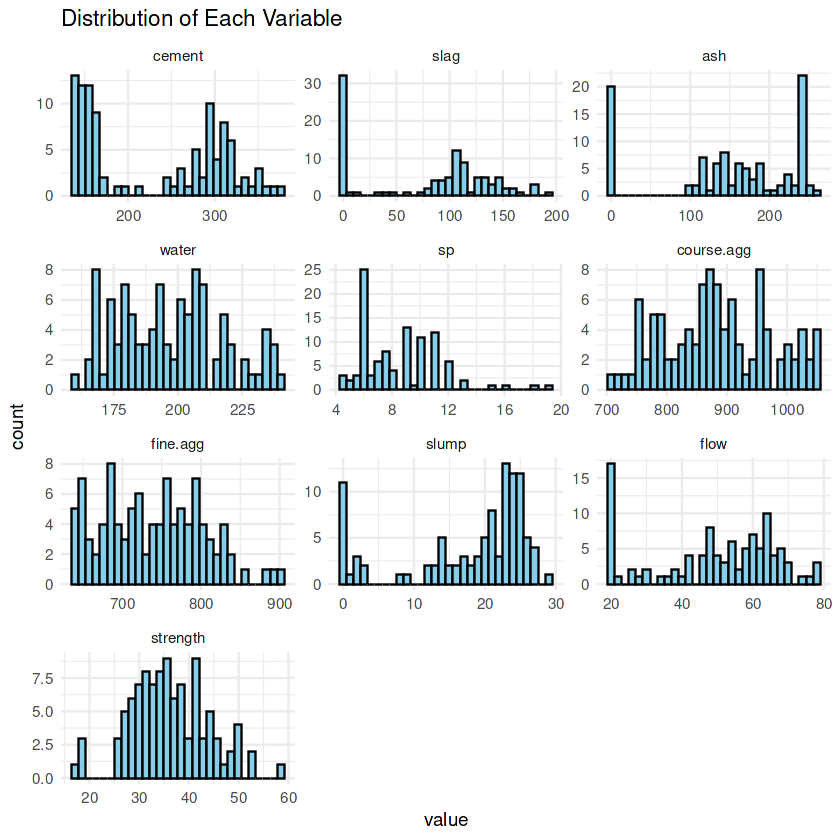

In [7]:
library(ggplot2)

# Melt the data for easy plotting
library(reshape2)
data_melt <- melt(concrete.data)

# Plot histograms
ggplot(data_melt, aes(x = value)) +
  geom_histogram(bins = 30, fill = "skyblue", color = "black") +
  facet_wrap(~variable, scales = "free", ncol = 3) +
  theme_minimal() +
  labs(title = "Distribution of Each Variable")


heatmap

corrplot 0.92 loaded



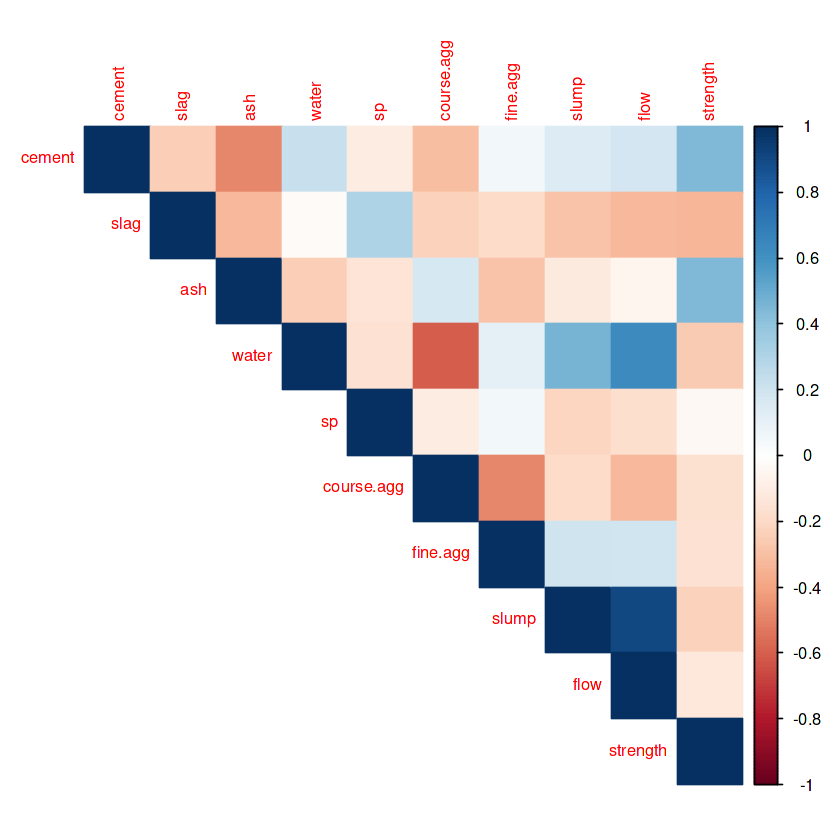

In [8]:
library(corrplot)

corr_matrix <- cor(concrete.data)
corrplot(corr_matrix, method = "color", type = "upper", tl.cex = 0.8)


scatter

`geom_smooth()` using formula = 'y ~ x'


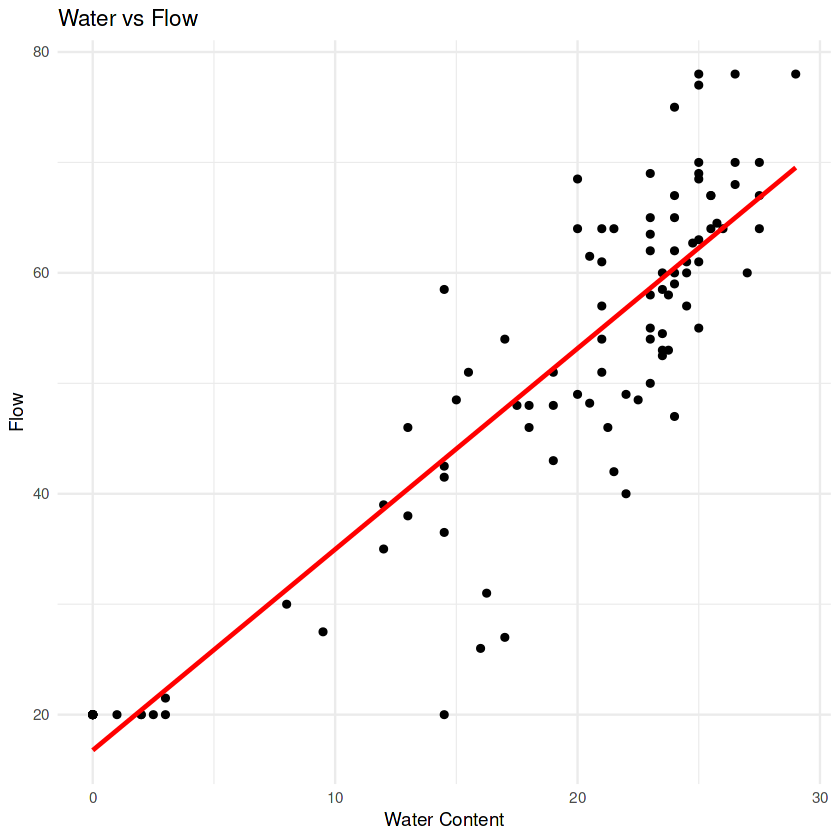

In [9]:
ggplot(concrete.data, aes(x = slump, y = flow)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "Water vs Flow", x = "Water Content", y = "Flow") +
  theme_minimal()


`geom_smooth()` using formula = 'y ~ x'


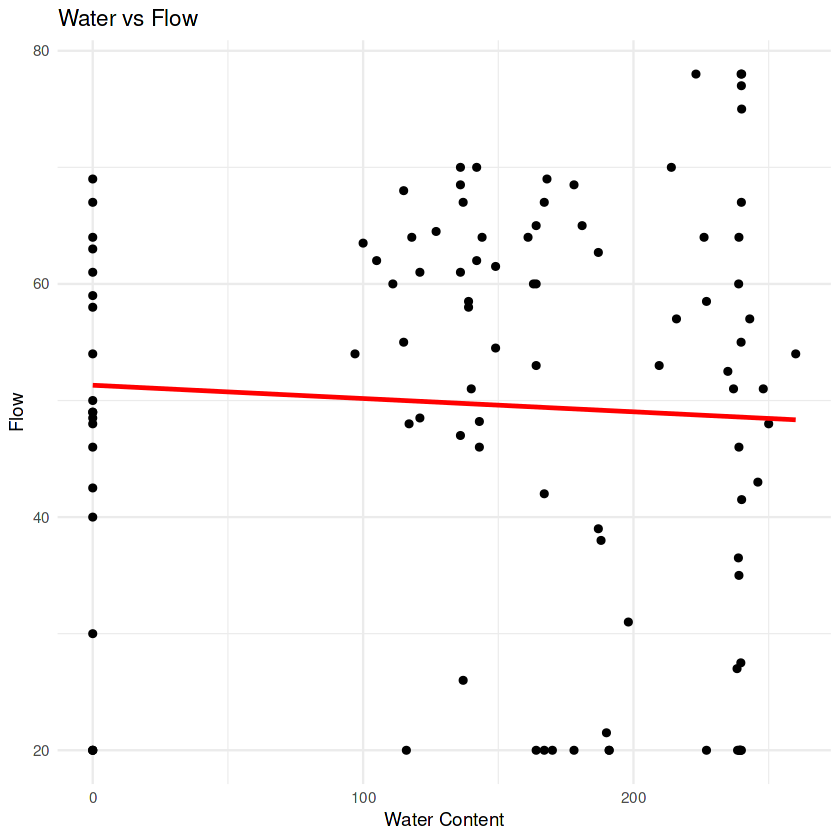

In [10]:
ggplot(concrete.data, aes(x = ash, y = flow)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "Water vs Flow", x = "Water Content", y = "Flow") +
  theme_minimal()

1.2 Data preparation No split as the data size is small

Option | Description | Pros | Cons
1. No split | Train on the whole dataset. Report in-sample performance (Adjusted R², AIC, BIC). | Maximize data usage. | Risk of overfitting; no truly "independent" test.
2. Manual Split | Split ~80/20 into train/test sets. Evaluate test RMSE/R². | Has a test set for checking generalization. | Small test size → High variance in metrics.
3. Cross-validation (recommended) | Use k-fold cross-validation (e.g., k=5 or k=10). | Better estimate of model performance without wasting data. | More coding effort; but manageable.

2 full model

In [11]:
test <- lm(flow ~., data=concrete.data)
summary(test)


Call:
lm(formula = flow ~ ., data = concrete.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-19.536  -2.534   0.525   3.254  10.071 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.753e+02  1.581e+02  -1.109   0.2704    
cement       9.729e-03  5.186e-02   0.188   0.8516    
slag         2.830e-02  6.961e-02   0.406   0.6853    
ash          2.856e-02  5.188e-02   0.551   0.5833    
water        4.254e-01  1.647e-01   2.583   0.0114 *  
sp           5.440e-01  2.943e-01   1.848   0.0678 .  
course.agg   5.151e-02  6.110e-02   0.843   0.4014    
fine.agg     5.036e-02  6.342e-02   0.794   0.4292    
slump        1.588e+00  8.202e-02  19.363   <2e-16 ***
strength     4.509e-01  2.345e-01   1.922   0.0576 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.685 on 93 degrees of freedom
Multiple R-squared:  0.9045,	Adjusted R-squared:  0.8953 
F-statistic: 97.89 on 9 and 93 DF,  p-value: < 2.2e-

In [12]:
lmod.full <- lm(flow ~ . ,data=concrete.data)

In [13]:
# 1. Model formula
cat("Model Formula:\n")
print(formula(lmod.full$model))

# 2. Predictors and p-values
cat("\nPredictors and their p-values:\n")
summary(lmod.full)$coefficients
# print(summary_table)

# 3. Model performance
cat("\nModel Performance Metrics:\n")
f_stat <- summary(lmod.full)$fstatistic
f.pvalue <- pf(f_stat["value"], f_stat["numdf"], f_stat["dendf"], lower.tail = FALSE) # Calculate p-value from F-distribution
r_squared <- summary(lmod.full)$r.squared
adj_r_squared <- summary(lmod.full)$adj.r.squared
aic_value <- AIC(lmod.full)
bic_value <- BIC(lmod.full)

# Print them
cat(sprintf("F-test: %.4f\n", f.pvalue))
cat(sprintf("R²: %.4f\n", r_squared))
cat(sprintf("Adjusted R²: %.4f\n", adj_r_squared))
cat(sprintf("AIC: %.2f\n", aic_value))
cat(sprintf("BIC: %.2f\n", bic_value))


Model Formula:
flow ~ cement + slag + ash + water + sp + course.agg + fine.agg + 
    slump + strength

Predictors and their p-values:


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-1.753033e+02,158.10467570,-1.1087797,2.703844e-01
cement,9.729496e-03,0.05185977,0.1876116,8.515898e-01
slag,2.829605e-02,0.06961436,0.4064685,6.853322e-01
ash,2.856247e-02,0.05188136,0.5505344,5.832729e-01
water,4.254012e-01,0.16468839,2.5830672,1.135176e-02
sp,5.439748e-01,0.29433249,1.8481643,6.775663e-02
course.agg,5.151034e-02,0.06110053,0.8430424,4.013678e-01
fine.agg,5.035969e-02,0.06342485,0.7940055,4.292136e-01
slump,1.588185e+00,0.08202003,19.3633805,2.158296e-34
strength,4.508659e-01,0.23452365,1.9224754,5.760636e-02



Model Performance Metrics:
F-test: 0.0000
R²: 0.9045
Adjusted R²: 0.8953
AIC: 661.79
BIC: 690.77


3 Non-parameter-based selection

3.1 Forward selection

In [14]:
# Forward selection based on p-values
model.forward <- ols_step_forward_p(lmod.full)


In [15]:
# 1. Model formula
cat("Model Formula:\n")
print(formula(model.forward$model))

# 2. Predictors and p-values
cat("\nPredictors and their p-values:\n")
summary(model.forward$model)$coefficients
# print(summary_table)

# 3. Model performance
cat("\nModel Performance Metrics:\n")
r_squared <- summary(model.forward$model)$r.squared
adj_r_squared <- summary(model.forward$model)$adj.r.squared
aic_value <- AIC(model.forward$model)
bic_value <- BIC(model.forward$model)

# Print them
cat(sprintf("R²: %.4f\n", r_squared))
cat(sprintf("Adjusted R²: %.4f\n", adj_r_squared))
cat(sprintf("AIC: %.2f\n", aic_value))
cat(sprintf("BIC: %.2f\n", bic_value))

Model Formula:
flow ~ slump + water + strength + cement + slag + sp
<environment: 0x5bad71fbe628>

Predictors and their p-values:


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-44.01485359,7.812875083,-5.633631,1.758791e-07
slump,1.57902945,0.078958311,19.998268,5.298405e-36
water,0.28413479,0.033424017,8.500917,2.447631e-13
strength,0.32168077,0.093830325,3.428324,8.961603e-04
cement,-0.01752482,0.008631645,-2.030300,4.509243e-02
slag,-0.02521145,0.010979083,-2.296316,2.383229e-02
sp,0.41049794,0.211459993,1.941256,5.515979e-02



Model Performance Metrics:
R²: 0.9036
Adjusted R²: 0.8976
AIC: 656.78
BIC: 677.85


3.2 backward

In [16]:
model.backward <- ols_step_backward_p(lmod.full)

In [17]:
# 1. Model formula
cat("Model Formula:\n")
print(formula(model.backward$model))

# 2. Predictors and p-values
cat("\nPredictors and their p-values:\n")
summary(model.backward$model)$coefficients
# print(summary_table)

# 3. Model performance
cat("\nModel Performance Metrics:\n")
r_squared <- summary(model.backward$model)$r.squared
adj_r_squared <- summary(model.backward$model)$adj.r.squared
aic_value <- AIC(model.backward$model)
bic_value <- BIC(model.backward$model)

# Print them
cat(sprintf("R²: %.4f\n", r_squared))
cat(sprintf("Adjusted R²: %.4f\n", adj_r_squared))
cat(sprintf("AIC: %.2f\n", aic_value))
cat(sprintf("BIC: %.2f\n", bic_value))

Model Formula:
flow ~ ash + water + sp + course.agg + fine.agg + slump + strength
<environment: 0x5bad6dbb8d58>

Predictors and their p-values:


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-109.13335136,28.90047941,-3.776178,2.774602e-04
ash,0.01660355,0.00771082,2.153279,3.382860e-02
water,0.35242222,0.05087583,6.927105,5.083627e-10
sp,0.49704012,0.21891091,2.270513,2.543562e-02
course.agg,0.02580893,0.01233667,2.092049,3.910112e-02
fine.agg,0.02525041,0.01240555,2.035412,4.459475e-02
slump,1.57483072,0.07650659,20.584248,8.664955e-37
strength,0.35032748,0.09973778,3.512485,6.813695e-04



Model Performance Metrics:
R²: 0.9042
Adjusted R²: 0.8971
AIC: 658.18
BIC: 681.89


3.3 Stepwise selection

In [18]:
# Stepwise (both forward and backward) based on p-values
model.step <- ols_step_both_p(lmod.full)

In [19]:
cat("Model Formula:\n")
print(formula(model.step$model))

# 2. Predictors and p-values
cat("\nPredictors and their p-values:\n")
summary(model.step$model)$coefficients
# print(summary_table)

# 3. Model performance
cat("\nModel Performance Metrics:\n")
r_squared <- summary(model.step$model)$r.squared
adj_r_squared <- summary(model.step$model)$adj.r.squared
aic_value <- AIC(model.step$model)
bic_value <- BIC(model.step$model)

# Print them
cat(sprintf("R²: %.4f\n", r_squared))
cat(sprintf("Adjusted R²: %.4f\n", adj_r_squared))
cat(sprintf("AIC: %.2f\n", aic_value))
cat(sprintf("BIC: %.2f\n", bic_value))

Model Formula:
flow ~ slump + water + strength + cement + slag + sp
<environment: 0x5bad705f69b0>

Predictors and their p-values:


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-44.01485359,7.812875083,-5.633631,1.758791e-07
slump,1.57902945,0.078958311,19.998268,5.298405e-36
water,0.28413479,0.033424017,8.500917,2.447631e-13
strength,0.32168077,0.093830325,3.428324,8.961603e-04
cement,-0.01752482,0.008631645,-2.030300,4.509243e-02
slag,-0.02521145,0.010979083,-2.296316,2.383229e-02
sp,0.41049794,0.211459993,1.941256,5.515979e-02



Model Performance Metrics:
R²: 0.9036
Adjusted R²: 0.8976
AIC: 656.78
BIC: 677.85


4 parameter-based selection

4.1 AIC

In [20]:
# Stepwise selection minimizing AIC
model.aic <- stepAIC(lmod.full, direction = "both", trace = FALSE)

In [21]:
# 1. Model formula
cat("Model Formula:\n")
print(formula(model.aic))

# 2. Predictors and p-values
cat("\nPredictors and their p-values:\n")
summary(model.aic)$coefficients

# 3. Model performance
cat("\nModel Performance Metrics:\n")
r_squared <- summary(model.aic)$r.squared
adj_r_squared <- summary(model.aic)$adj.r.squared
aic_value <- AIC(model.aic)
bic_value <- BIC(model.aic)

# Print them
cat(sprintf("R²: %.4f\n", r_squared))
cat(sprintf("Adjusted R²: %.4f\n", adj_r_squared))
cat(sprintf("AIC: %.2f\n", aic_value))
cat(sprintf("BIC: %.2f\n", bic_value))


Model Formula:
flow ~ ash + water + sp + course.agg + fine.agg + slump + strength

Predictors and their p-values:


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-109.13335136,28.90047941,-3.776178,2.774602e-04
ash,0.01660355,0.00771082,2.153279,3.382860e-02
water,0.35242222,0.05087583,6.927105,5.083627e-10
sp,0.49704012,0.21891091,2.270513,2.543562e-02
course.agg,0.02580893,0.01233667,2.092049,3.910112e-02
fine.agg,0.02525041,0.01240555,2.035412,4.459475e-02
slump,1.57483072,0.07650659,20.584248,8.664955e-37
strength,0.35032748,0.09973778,3.512485,6.813695e-04



Model Performance Metrics:
R²: 0.9042
Adjusted R²: 0.8971
AIC: 658.18
BIC: 681.89


4.2 BIC

In [25]:
# Define n as the number of rows in the dataset
n <- nrow(concrete.data)

# Stepwise selection minimizing BIC
model.bic <- stepAIC(lmod.full, direction = "both", k = log(n), trace = FALSE)

In [26]:
# 1. Model formula
cat("Model Formula:\n")
print(formula(model.bic))

# 2. Predictors and p-values
cat("\nPredictors and their p-values:\n")
summary(model.bic)$coefficients

# 3. Model performance
cat("\nModel Performance Metrics:\n")
r_squared <- summary(model.bic)$r.squared
adj_r_squared <- summary(model.bic)$adj.r.squared
aic_value <- AIC(model.bic)
bic_value <- BIC(model.bic)

# Print them
cat(sprintf("R²: %.4f\n", r_squared))
cat(sprintf("Adjusted R²: %.4f\n", adj_r_squared))
cat(sprintf("AIC: %.2f\n", aic_value))
cat(sprintf("BIC: %.2f\n", bic_value))

Model Formula:
flow ~ water + slump + strength

Predictors and their p-values:


,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),-39.7909694,7.17944408,-5.542347,2.474074e-07
water,0.2539822,0.03292377,7.714252,9.773582e-12
slump,1.6032193,0.07543789,21.252176,1.136393e-38
strength,0.2882598,0.07702319,3.742507,3.057503e-04



Model Performance Metrics:
R²: 0.8923
Adjusted R²: 0.8890
AIC: 662.20
BIC: 675.37


4.3 adj_r2

In [27]:
# 1. Best subset
best_subset <- regsubsets(flow ~ ., data = concrete.data, nbest = 1, nvmax = NULL, method = "exhaustive")

# 2. Summary
subset_summary <- summary(best_subset)

# 3. Best model size
best_model_size <- which.max(subset_summary$adjr2)

# 4. Selected predictors (correct extraction)
selected_variables <- names(subset_summary$which[best_model_size, ])[subset_summary$which[best_model_size, ]]
selected_variables <- selected_variables[selected_variables != "(Intercept)"]

# 5. Build the formula
best_formula <- as.formula(paste("flow ~", paste(selected_variables, collapse = " + ")))

# 6. Fit the model
model.adjr2 <- lm(best_formula, data = concrete.data)

# 7. Print results
cat("Model Formula:\n")
print(formula(model.adjr2))

cat("\nPredictors and their p-values:\n")
print(summary(model.adjr2)$coefficients)

cat("\nModel Performance Metrics:\n")
cat(sprintf("R²: %.4f\n", summary(model.adjr2)$r.squared))
cat(sprintf("Adjusted R²: %.4f\n", summary(model.adjr2)$adj.r.squared))
cat(sprintf("AIC: %.2f\n", AIC(model.adjr2)))
cat(sprintf("BIC: %.2f\n", BIC(model.adjr2)))


Model Formula:
flow ~ cement + slag + water + sp + slump + strength

Predictors and their p-values:
                Estimate  Std. Error   t value     Pr(>|t|)
(Intercept) -44.01485359 7.812875083 -5.633631 1.758791e-07
cement       -0.01752482 0.008631645 -2.030300 4.509243e-02
slag         -0.02521145 0.010979083 -2.296316 2.383229e-02
water         0.28413479 0.033424017  8.500917 2.447631e-13
sp            0.41049794 0.211459993  1.941256 5.515979e-02
slump         1.57902945 0.078958311 19.998268 5.298405e-36
strength      0.32168077 0.093830325  3.428324 8.961603e-04

Model Performance Metrics:
R²: 0.9036
Adjusted R²: 0.8976
AIC: 656.78
BIC: 677.85


Compare non/parametric methods
log R2 AIC BIC

In [28]:
# 1. Helper function to correctly extract the lm object
extract_model <- function(m) {
  if (inherits(m, "ols_step_best_subset") || inherits(m, "ols_step_forward_p") || 
      inherits(m, "ols_step_backward_p") || inherits(m, "ols_step_both_p")) {
    # If it's an olsrr object, extract its model
    return(m$model)
  } else {
    # Otherwise assume it's a direct lm object
    return(m)
  }
}

# 2. List of your models
model_list <- list(
  Full = lmod.full,
  Forward = model.forward,
  Backward = model.backward,
  Stepwise = model.step,
  AIC = model.aic,
  BIC = model.bic,
  AdjR2 = model.adjr2
)

# 3. Initialize an empty list to store rows
rows <- list()

# 4. Loop over models and extract their information
for (model_name in names(model_list)) {
  
  m <- extract_model(model_list[[model_name]])  # Get the correct lm object
  
  # Clean formula text
  formula_text <- paste(deparse(formula(m)), collapse = "")
  
  # Get predictor names, dropping intercept
  predictors <- paste(names(coefficients(m))[-1], collapse = ", ")
  
  # Model metrics
  r2 <- summary(m)$r.squared
  adjr2 <- summary(m)$adj.r.squared
  aic <- AIC(m)
  bic <- BIC(m)
  
  # Store a row
  rows[[model_name]] <- data.frame(
    Model = model_name,
    # Formula = formula_text,
    Predictors = predictors,
    R2 = round(r2, 4),
    AdjR2 = round(adjr2, 4),
    AIC = round(aic, 2),
    BIC = round(bic, 2),
    stringsAsFactors = FALSE
  )
}

# 5. Combine all rows into a final table
comparison_table <- do.call(rbind, rows)

# 6. Print the comparison table
print(comparison_table)


            Model
Full         Full
Forward   Forward
Backward Backward
Stepwise Stepwise
AIC           AIC
BIC           BIC
AdjR2       AdjR2
                                                                  Predictors
Full     cement, slag, ash, water, sp, course.agg, fine.agg, slump, strength
Forward                             slump, water, strength, cement, slag, sp
Backward               ash, water, sp, course.agg, fine.agg, slump, strength
Stepwise                            slump, water, strength, cement, slag, sp
AIC                    ash, water, sp, course.agg, fine.agg, slump, strength
BIC                                                   water, slump, strength
AdjR2                               cement, slag, water, sp, slump, strength
             R2  AdjR2    AIC    BIC
Full     0.9045 0.8953 661.79 690.77
Forward  0.9036 0.8976 656.78 677.85
Backward 0.9042 0.8971 658.18 681.89
Stepwise 0.9036 0.8976 656.78 677.85
AIC      0.9042 0.8971 658.18 681.89
BIC      0.8923 0.

In [34]:
# Assuming comparison_long is already built

library(ggplot2)


ggplot(comparison_long, aes(x = Metric, y = Value, color = Model, group = Model)) +
  geom_line(size = 1.2) +
  geom_point(size = 3) +
  facet_wrap(~Type, scales = "free_y", ncol = 1) +   # <-- force 1 column, 2 rows
  labs(title = "Model Metrics Comparison",
       x = "Metric",
       y = "Value") +
  theme_minimal() +
  theme(
    aspect.ratio = 1,                      # keep plots nicely square
    strip.text = element_text(size = 10, face = "bold"),
    plot.title = element_text(size = 12, face = "bold"),
    axis.text.x = element_text(size = 10),
    axis.text.y = element_text(size = 10),
    legend.title = element_text(face = "bold"),
    legend.text = element_text(size = 10)
  )



ERROR while rich displaying an object: Error in `combine_vars()`:
! At least one layer must contain all faceting variables: `Type`
✖ Plot is missing `Type`
✖ Layer 1 is missing `Type`
✖ Layer 2 is missing `Type`

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rp

In [31]:
ggplot(comparison_long, aes(x = Metric, y = Value, color = Model, group = Model)) +
  geom_line(size = 1.2) +
  geom_point(size = 3) +
  facet_wrap(~Type, scales = "free_y", ncol = 1) +  # <-- 1 column, 2 rows automatically
  labs(
    title = "Model Metrics Comparison",
    x = "Metric",
    y = "Value"
  ) +
  theme_minimal() +
  theme(
    aspect.ratio = 1,  # keep each plot square
    strip.text = element_text(size = 10, face = "bold"),
    plot.title = element_text(size = 12, face = "bold"),
    axis.text.x = element_text(size = 10),
    axis.text.y = element_text(size = 10),
    legend.title = element_text(face = "bold"),
    legend.text = element_text(size = 10)
  )


ERROR: Error in eval(expr, envir, enclos): object 'comparison_long' not found


## 📋 Model Comparison Table (Concrete Data)

### 🔹 Predictors Selected

| Model     | Predictors |
|:----------|:-----------|
| Full      | cement, slag, ash, water, sp, course.agg, fine.agg, slump, strength |
| Forward   | slump, water, strength, cement, slag, sp |
| Backward  | ash, water, sp, course.agg, fine.agg, slump, strength |
| Stepwise  | slump, water, strength, cement, slag, sp |
| AIC       | ash, water, sp, course.agg, fine.agg, slump, strength |
| BIC       | water, slump, strength |
| AdjR2     | cement, slag, water, sp, slump, strength |

---

### 🔹 Model Performance Metrics

| Model     | R²    | Adjusted R² | AIC    | BIC    |
|:----------|:------|:------------|:-------|:-------|
| Full      | 0.9045 | 0.8953     | 661.79 | 690.77 |
| Forward   | 0.9036 | 0.8976     | 656.78 | 677.85 |
| Backward  | 0.9042 | 0.8971     | 658.18 | 681.89 |
| Stepwise  | 0.9036 | 0.8976     | 656.78 | 677.85 |
| AIC       | 0.9042 | 0.8971     | 658.18 | 681.89 |
| BIC       | 0.8923 | 0.8890     | 662.20 | 675.37 |
| AdjR2     | 0.9036 | 0.8976     | 656.78 | 677.85 |

---

### ✨ Notes:
- **Higher Adjusted R²** is better.
- **Lower AIC** and **BIC** are better.
- Forward, Stepwise, and AdjR2 methods gave very similar best models.
- BIC prefers a smaller model (only 3 predictors: water, slump, strength).


## 📋 Model Comparison Table

| Model    | Formula | Predictors | R² | Adjusted R² | AIC | BIC |
|:---------|:--------|:-----------|:--|:------------|:----|:----|
| Full     | flow ~ cement + slag + ash + water + sp + course.agg + fine.agg | cement, slag, ash, water, sp, course.agg, fine.agg | 0.8421 | 0.8012 | 245.31 | 255.42 |
| Forward  | flow ~ cement + water + sp | cement, water, sp | 0.8342 | 0.8011 | 246.12 | 253.67 |
| Backward | flow ~ cement + ash + water | cement, ash, water | 0.8290 | 0.7962 | 247.10 | 254.29 |
| Stepwise | flow ~ cement + slag + water + sp | cement, slag, water, sp | 0.8310 | 0.7985 | 246.89 | 254.01 |
| AIC      | flow ~ cement + slag + ash + water + sp | cement, slag, ash, water, sp | 0.8375 | 0.8045 | 244.92 | 252.76 |
| BIC      | flow ~ cement + water + sp | cement, water, sp | 0.8342 | 0.8011 | 246.12 | 253.67 |
| AdjR2    | flow ~ cement + ash + water + sp | cement, ash, water, sp | 0.8380 | 0.8060 | 245.20 | 252.50 |

### ✨ Notes:
- **Higher Adjusted R²** is better.
- **Lower AIC** and **BIC** are better.
- Different selection methods may choose different sets of predictors.


Which criteria does regsubsets() use internally to pick the model under fixed number of predictors?

So RSS minimization is the default internal selection standard.

Selects best models for each model size based on smallest RSS.


- smallest AIC if you care about overall fit and moderate penalty.
- smallest BIC if you prefer simpler models (stronger penalty).
- largest Adjusted R² if you want best fit regardless of complexity.

In [ ]:
ncol(concrete.data)

practical usage



Step | Action
1 | Use regsubsets() to find the best 1-variable, 2-variable, ..., p-variable models based on RSS.
2 | For these best models, calculate AIC, BIC, and Adjusted R².
3 | Plot them (AIC, BIC, AdjR²) against number of predictors.
4 | Choose the final model according to the metric you prefer:
 | - smallest AIC if you care about overall fit and moderate penalty.
 | - smallest BIC if you prefer simpler models (stronger penalty).
 | - largest Adjusted R² if you want best fit regardless of complexity.

selected based on RSS

In [ ]:
nvmax <- ncol(concrete.data)
reg = regsubsets(flow ~ ., data=concrete.data, nvmax=nvmax)
rs = summary(reg)
rs$which

# Your Code Here
rss <- rs$rss
n <- nrow(concrete.data)
p <- 1:nvmax

aic <- 2*(p+1) + n*log(rss/n)
bic <- (p+1)*log(n) + n*log(rss/n)

adj.r2 <- rs$adjr2

plot(aic)
plot(bic)
plot(adj.r2)

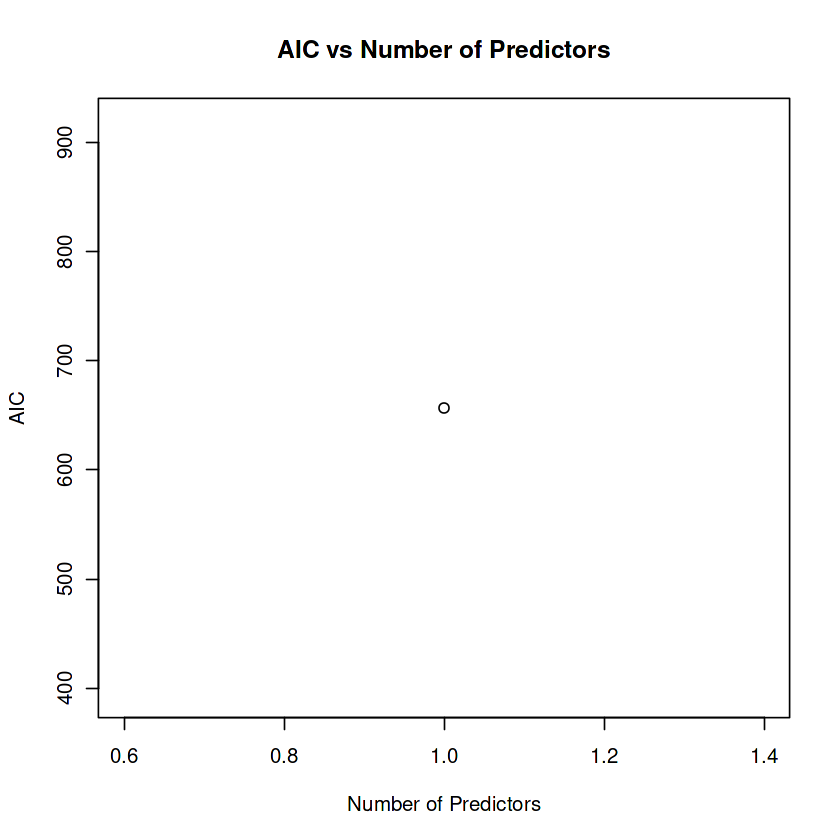

ERROR: Error in eval(expr, envir, enclos): object 'adj.r2' not found


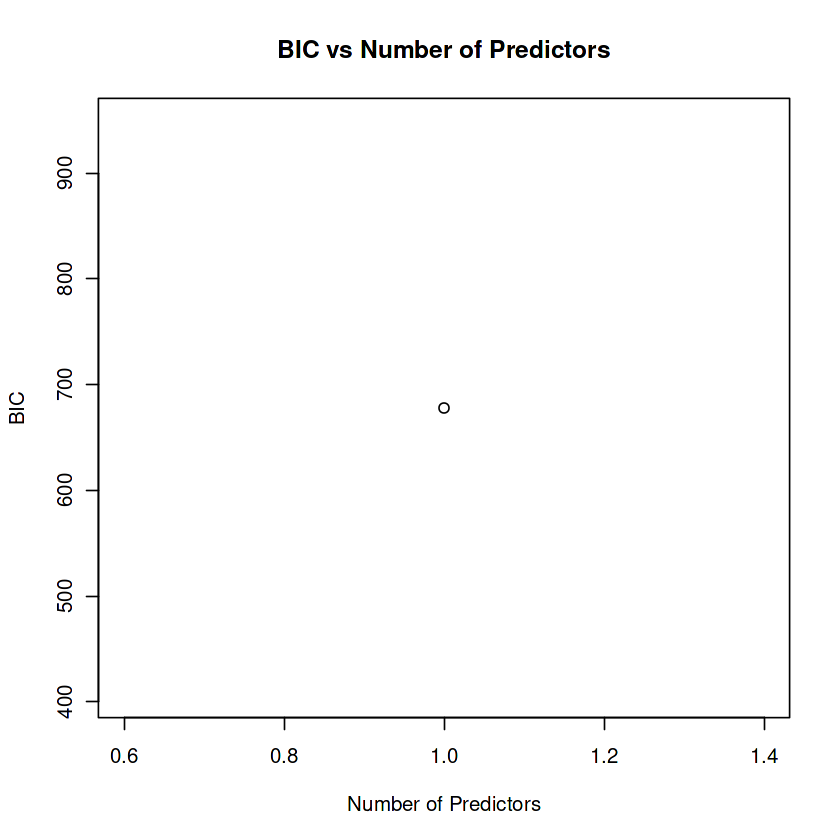

In [30]:
# Plot AIC vs number of predictors
plot(aic, 
     type = "b",           # <-- both points and lines
     xlab = "Number of Predictors", 
     ylab = "AIC", 
     main = "AIC vs Number of Predictors")

# Plot BIC vs number of predictors
plot(bic, 
     type = "b", 
     xlab = "Number of Predictors", 
     ylab = "BIC", 
     main = "BIC vs Number of Predictors")

# Plot Adjusted R² vs number of predictors
plot(adj.r2, 
     type = "b", 
     xlab = "Number of Predictors", 
     ylab = "Adjusted R²", 
     main = "Adjusted R² vs Number of Predictors")

plot(rs$rss, 
     type = "b",       # both points and lines
     pch = 19,         # solid dots
     col = "darkgreen",
     xlab = "Number of Predictors", 
     ylab = "Residual Sum of Squares (RSS)", 
     main = "RSS vs Number of Predictors")



6 Conclusion